In [33]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [54]:
#df = pd.read_json("./data/data_w_survey_success.csv", lines = True)
# preview data
df = pd.DataFrame.from_csv('./data/founder_V3_withsurvey.csv').reset_index()
df.head()

,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,...,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
0,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,JB Straubel,Co-Founder and CTO,The story of JB Straubel's career started at a...,1,100,2,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mark Zuckerberg,Founder & CEO,Mark Zuckerberg is the founder and CEO of Face...,1,19678,10,6,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Ross Mason,Founder and VP of Product Strategy,"Created the Mule Project, Founded MuleSoft, go...",1,128,1,6,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Rahul Gandhi,Co-Founder & SVP of Finance Operations,Rahul is a Co-founder & Senior Vice President ...,1,861,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 32 columns):
Full Name                          18361 non-null object
Primary Job Title                  18361 non-null object
Bio                                18361 non-null object
Gender                             18361 non-null int64
Number of News Articles            18361 non-null int64
Number of Founded Organizations    18361 non-null int64
Number of Portfolio Companies      18361 non-null int64
Number of Investments_x            18361 non-null int64
Number of Partner Investments      18361 non-null int64
Number of Lead Investments_x       18361 non-null int64
Number of Exits_x                  18361 non-null int64
Number of Events_x                 18361 non-null int64
Categories                         18361 non-null object
Headquarters Location              18361 non-null object
Operating Status                   18361 non-null int64
Founded Date                       18361 non-n

In [36]:
print(df["WorkLifeBalance"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
18331   NaN
18332   NaN
18333   NaN
18334   NaN
18335   NaN
18336   NaN
18337   NaN
18338   NaN
18339   NaN
18340   NaN
18341   NaN
18342   NaN
18343   NaN
18344   NaN
18345   NaN
18346   NaN
18347   NaN
18348   NaN
18349   NaN
18350   NaN
18351   NaN
18352   NaN
18353   NaN
18354   NaN
18355   NaN
18356   NaN
18357   NaN
18358   NaN
18359   NaN
18360   NaN
Name: WorkLifeBalance, Length: 18361, dtype: float64


In [37]:
# split position before @ and the company

In [38]:
# count positions

In [39]:
df

,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,...,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
0,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,JB Straubel,Co-Founder and CTO,The story of JB Straubel's career started at a...,1,100,2,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mark Zuckerberg,Founder & CEO,Mark Zuckerberg is the founder and CEO of Face...,1,19678,10,6,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Ross Mason,Founder and VP of Product Strategy,"Created the Mule Project, Founded MuleSoft, go...",1,128,1,6,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Rahul Gandhi,Co-Founder & SVP of Finance Operations,Rahul is a Co-founder & Senior Vice President ...,1,861,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,Sam Rosen,Founder & CEO,Sam Rosen is Founder & CEO at MakeSpace.com,1,15,3,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Adam LeVasseur,Co-Founder and CTO,Adam is the Co-founder & CTO of MakeSpace.,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Tony Fadell,Founder & CEO,Tony Fadell led the team that created the firs...,1,1569,2,5,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,Matt Rogers,Founder & VP of Engineering,Matt Rogers is co-founder and chief product of...,1,310,1,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,Marc Benioff,Founder & CEO,Marc Benioff is chairman and CEO of Salesforce...,1,3669,1,73,101,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [40]:
# survey results
survey = df[df.FearOfFailure.notnull()]
#survey = survey[survey.Gender.notnull()]
survey

,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,...,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
448,Gordon Moore,Co-Founder,Gordon Moore is a Co-Founder and Chairman at I...,1,60,3,0,0,0,0,...,2.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,1
994,Daniel Broukhim,Co-Founder & Co-Chief Executive Officer,Daniel Broukhim is CEO and Co-founder of Charl...,1,5,2,4,4,0,0,...,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1
1726,David Breslauer,Co-Founder / CSO,David is the co-founder and CSO of Bolt Threads.,1,2,1,0,0,0,0,...,1.0,5.0,4.0,5.0,1.0,5.0,5.0,3.0,1.0,1
2221,David Rolnitzky,"Founder, CPO",David heads up product design and strategy for...,1,4,1,0,0,0,0,...,4.0,4.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1
3255,Teodoro D'Ambrosio,Founder and Co-CEO,Teodoro is an Internet entrepreneurs and inves...,1,1,4,15,15,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,0
3262,Craig Davis,Founder and CEO,Craig started his passion of taking complex da...,1,1,1,0,0,0,0,...,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,1.0,0
4322,Natasia Malaihollo,Founder and Chief Executive Officer,Natasia Malaihollo is the CEO and Lead Program...,0,5,2,0,0,0,0,...,2.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,1.0,0
5542,Matt Bendett,Founder,Matt is the Co-Founder of PeerSpace.,1,5,1,0,0,0,0,...,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,1.0,0
5634,Derek Merrill,COO & Founder,Product focused entrepreneur with special inte...,1,6,5,0,0,0,0,...,3.0,5.0,4.0,3.0,5.0,4.0,4.0,4.0,1.0,0
5711,Joe Hellerstein,Founder & Chief Strategy Officer,Joe is Trifacta_Ì£_s Chief Executive Officer a...,1,29,1,0,0,0,0,...,2.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,2.0,1


In [69]:
# shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

survey = shuffle(survey).reset_index(drop=True) #copy
X = survey.iloc[:,21:32]
Y = survey['Success']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.06, random_state=100)
print ('Train data size:', len(X_train))
print ('Test data size:', len(X_test))
X

Train data size: 14
Test data size: 1


,Trust,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
0,5.0,1.0,5.0,4.0,5.0,1.0,5.0,5.0,3.0,1.0,1
1,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,0
2,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,5.0,4.0,0
3,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1
4,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1
5,4.0,3.0,5.0,4.0,3.0,5.0,4.0,4.0,4.0,1.0,0
6,3.0,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,1.0,0
7,5.0,4.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,1.0,0
8,5.0,2.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,1
9,3.0,4.0,5.0,4.0,5.0,5.0,3.0,2.0,2.0,1.0,0


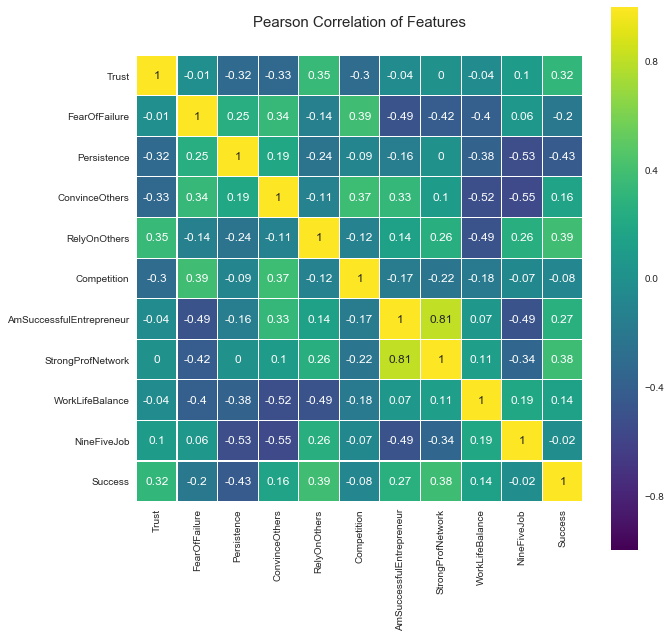

In [70]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [71]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, Y_test) * 100, 2)

print('> Logistic Regression')
print('Training accuracy: ',acc_log_train)
print('Testing accuracy: ',acc_log_test)


> Logistic Regression
Training accuracy:  100.0
Testing accuracy:  100.0


In [72]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc_train = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, Y_test) * 100, 2)

print('> Support Vector Machines')
print('Training accuracy: ',acc_svc_train)
print('Testing accuracy: ',acc_svc_test)

> Support Vector Machines
Training accuracy:  78.57
Testing accuracy:  100.0


In [73]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron_train = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(X_test, Y_test) * 100, 2)

print('> Perceptron')
print('Training accuracy: ',acc_perceptron_train)
print('Testing accuracy: ',acc_perceptron_test)

> Perceptron
Training accuracy:  42.86
Testing accuracy:  100.0


In [74]:

# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, Y_test) * 100, 2)

print('> kNN')
print('Training accuracy: ',acc_knn_train)
print('Testing accuracy: ',acc_knn_test)

> kNN
Training accuracy:  78.57
Testing accuracy:  100.0


In [75]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)

print('> Random Forest')
print('Training accuracy: ',acc_random_forest_train)
print('Testing accuracy: ',acc_random_forest_test)

> Random Forest
Training accuracy:  100.0
Testing accuracy:  100.0


In [76]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, Y_train)
Y_pred = gradboost.predict(X_test)
acc_XGBoost_train = round(gradboost.score(X_train, Y_train) * 100, 2)
acc_XGBoost_test = round(gradboost.score(X_test, Y_test) * 100, 2)

print('> XGBoost')
print('Training accuracy: ',acc_XGBoost_train)
print('Testing accuracy: ',acc_XGBoost_test)

> XGBoost
Training accuracy:  100.0
Testing accuracy:  100.0


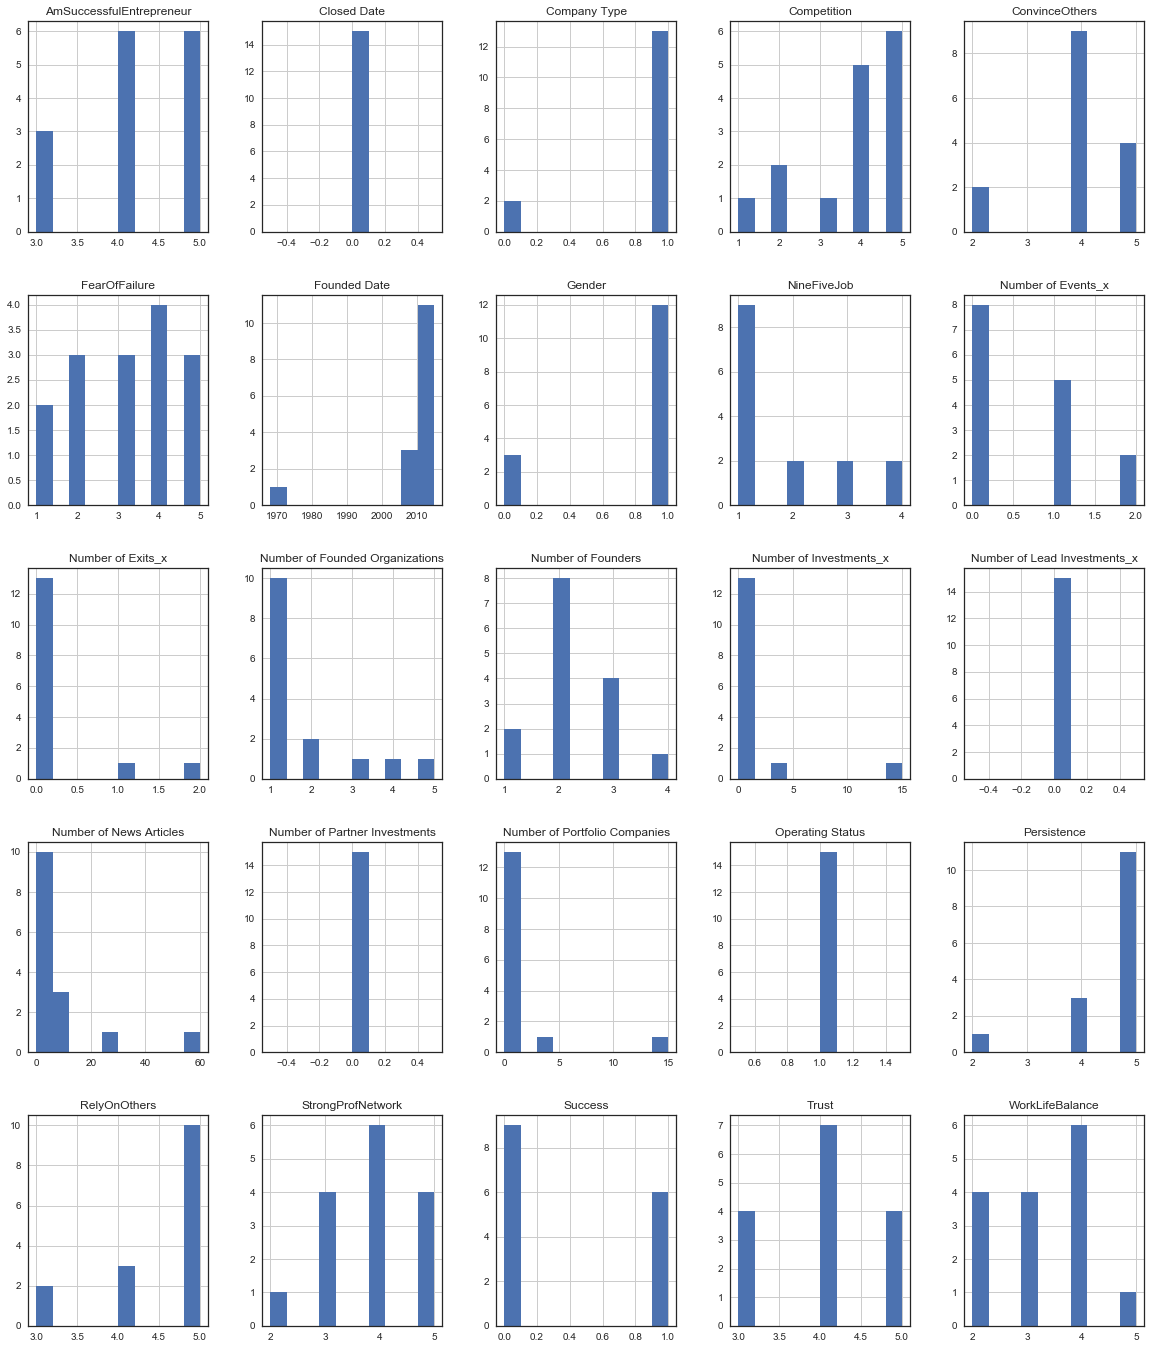

In [77]:
survey.hist(figsize = (20,24))
plt.show()

In [79]:
import math;
df2 = df.copy()

#bins
# 4 equirange bins
CbRank_range = df2.CbRank.max() - df2.CbRank.min()
CbRank_bins = [-math.inf, 
            (df2.CbRank.min() + CbRank_range*(1/4)) ,
            (df2.CbRank.min() + CbRank_range*(1/2)) ,
            (df2.CbRank.min() + CbRank_range*(3/4)) ,
            math.inf]

q1 = df2.CbRank.min() + CbRank_range*(1/4)
q2 = df2.CbRank.min() + CbRank_range*(1/2)
q3 = df2.CbRank.min() + CbRank_range*(3/4)


print(df2.CbRank.min() + CbRank_range*(1/4))
print(df2.CbRank.min() + CbRank_range*(1/2))
print(df2.CbRank.min() + CbRank_range*(3/4))

AttributeError: 'DataFrame' object has no attribute 'CbRank'

In [ ]:
# cutting & assigning new labels
CbRank_labels = [0,q1,q2,q3]
df2['CbRank'] = pd.cut(df2['CbRank'], CbRank_bins, labels = CbRank_labels)

print('CbRank distribution:')
print(df2.CbRank.value_counts())
print()

sns.countplot(x = 'Success_all', hue = "CbRank", data = df2, order = [1,0])

In [ ]:
import math;
df2 = df.copy()

#bins
# 4 equirange bins
CbRank_range = df2.CbRank.max() - df2.CbRank.min()
CbRank_bins = [-math.inf, 10000,math.inf]

q1 = 10000


# cutting & assigning new labels
CbRank_labels = [0,q1]
df2['CbRank'] = pd.cut(df2['CbRank'], CbRank_bins, labels = CbRank_labels)

print('CbRank distribution:')
print(df2.CbRank.value_counts())
print()

sns.countplot(x = 'Success_all', hue = "CbRank", data = df2, order = [1,0])

# Feature Engineering##

In [80]:
survey = shuffle(survey).reset_index(drop=True) #copy
X = survey.iloc[:,3:]
Y = survey['Success']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)
print ('Train data size:', len(X_train))
print ('Test data size:', len(X_test))
X

Train data size: 12
Test data size: 3


,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,...,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
0,0,5,2,0,0,0,0,0,1,"Artificial Intelligence, Market Research, Comp...",...,2.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,1.0,0
1,1,7,1,0,0,0,0,0,1,"Internet, Social Network",...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1
2,1,2,1,0,0,0,0,0,2,"Manufacturing, Fashion, Biotechnology",...,1.0,5.0,4.0,5.0,1.0,5.0,5.0,3.0,1.0,1
3,1,60,3,0,0,0,0,0,0,"Product Design, Semiconductor, Hardware, Manuf...",...,2.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,1
4,1,1,1,0,0,0,0,0,0,"Personal Finance, Payments, Financial Services",...,5.0,5.0,4.0,5.0,4.0,3.0,3.0,2.0,4.0,0
5,0,8,1,0,0,0,0,0,1,"Parenting, Family, Ride Sharing, Children, Tra...",...,4.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,1.0,0
6,1,4,1,0,0,0,0,0,0,"Lead Generation, Enterprise Software, Sales Au...",...,4.0,4.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1
7,1,0,1,0,0,0,0,0,0,"Hospital, Medical, Health Care",...,1.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,2.0,0
8,1,1,1,0,0,0,0,0,0,0,...,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,1.0,0
9,0,1,1,0,0,0,0,0,1,"Audio, Podcast, SEO, Digital Media",...,3.0,4.0,2.0,4.0,2.0,4.0,4.0,5.0,4.0,0


In [84]:
survey.head()

,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,...,FearOfFailure,Persistence,ConvinceOthers,RelyOnOthers,Competition,AmSuccessfulEntrepreneur,StrongProfNetwork,WorkLifeBalance,NineFiveJob,Success
0,Natasia Malaihollo,Founder and Chief Executive Officer,Natasia Malaihollo is the CEO and Lead Program...,0,5,2,0,0,0,0,...,2.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,1.0,0
1,Andrew Laffoon,CEO & Founder,"Andrew is the CEO and Co-Founder of Mixbook, a...",1,7,1,0,0,0,0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1
2,David Breslauer,Co-Founder / CSO,David is the co-founder and CSO of Bolt Threads.,1,2,1,0,0,0,0,...,1.0,5.0,4.0,5.0,1.0,5.0,5.0,3.0,1.0,1
3,Gordon Moore,Co-Founder,Gordon Moore is a Co-Founder and Chairman at I...,1,60,3,0,0,0,0,...,2.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,1
4,Liran Amrany,Founder,Founder of Debitize.,1,1,1,0,0,0,0,...,5.0,5.0,4.0,5.0,4.0,3.0,3.0,2.0,4.0,0


In [85]:
# check dimensions of the train and test datasets
print("Shapes Before: (train) (test) = ", train_df.shape, test_df.shape)

print()

# Drop columns 'Ticket', 'Cabin', need to do it for both test and training
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("Shapes After: (train) (test) =", train_df.shape, test_df.shape)


NameError: name 'train_df' is not defined

ValueError: could not convert string to float: 'Agent IQ'

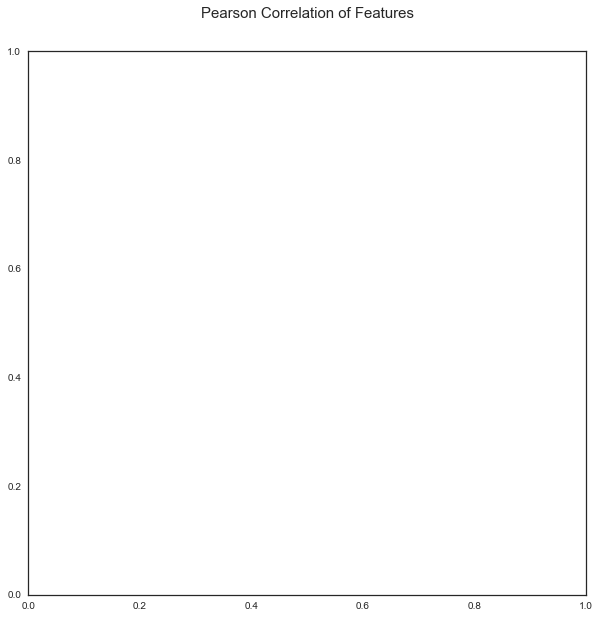

In [68]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)